<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/IMPLEMENTING_SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING DEPENDENCIES

In [1]:
import numpy as np

Support Vector Machine Classifier

In [2]:
class SVM_classifier():
  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter
  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):
    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape
    # initiating the weight value and bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    # implementing Gradient Descent algorithm for Optimization
    for i in range(self.no_of_iterations):
      self.update_weights()
  # function for updating the weight and bias value
  def update_weights(self):
    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)
    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):
      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
      if (condition == True):
        dw = 2 * self.lambda_parameter * self.w
        db = 0
      else:
        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db
  # predict the label for a given input value
  def predict(self, X):
    output = np.dot(X, self.w) - self.b
    predicted_labels = np.sign(output)
    y_hat = np.where(predicted_labels <= -1, 0, 1)
    return y_hat

Importing the Dependencies

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [4]:
# loading the data from csv file to pandas dataframe
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [5]:
# print the first 5 rows of the dataframe
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# number of rows and columns in the dataset
diabetes_data.shape

(768, 9)

In [7]:
# getting the statistical measures of the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [9]:
# separating the features and target
features = diabetes_data.drop(columns='Outcome', axis=1)
target = diabetes_data['Outcome']

In [10]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


DATA STANDARDIZATION

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(features)

StandardScaler()

In [14]:
standardized_data = scaler.transform(features)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [15]:
features = standardized_data
target = diabetes_data['Outcome']

In [16]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state = 2)
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [18]:
# Support Vector Machine Classifier
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)
# training the SVM classifier with training data
classifier.fit(X_train, Y_train)

Model Evaluation

Model Evaluation

In [19]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [20]:
print('Accuracy score on training data = ', training_data_accuracy)

Accuracy score on training data =  0.7768729641693811


In [21]:
# accuracy on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [22]:
print('Accuracy score on test data = ', test_data_accuracy)

Accuracy score on test data =  0.7532467532467533


BUILDING A PREDICTIVE MODEL

In [23]:
input_data = (5,166,72,19,175,25.8,0.587,51)
# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The Person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The Person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


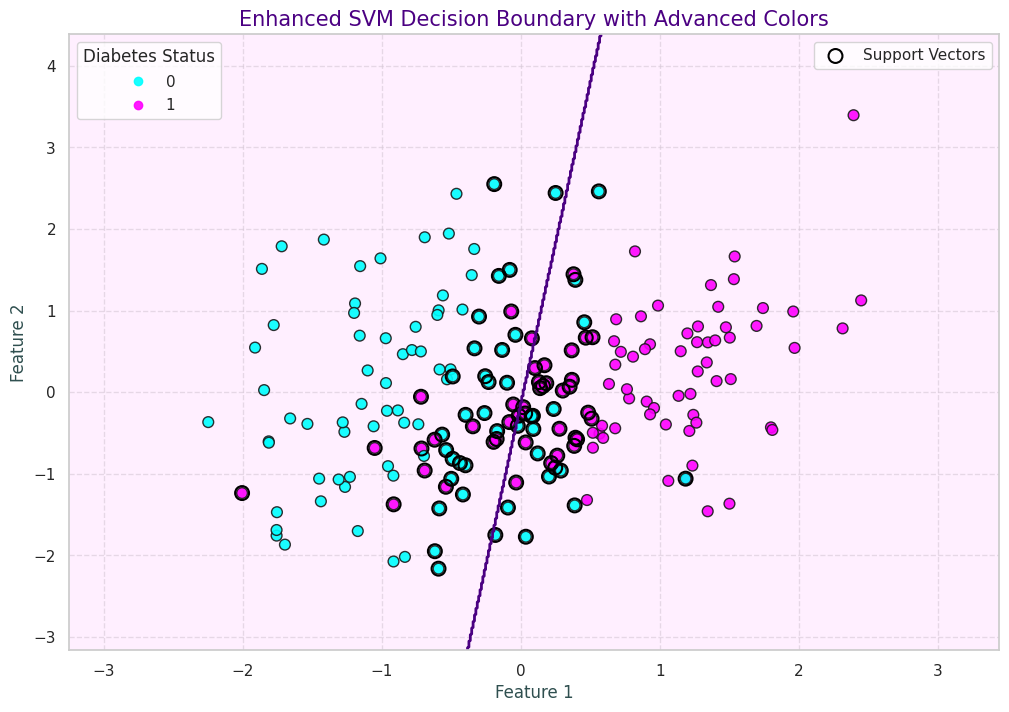

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
# Generate a sample dataset (or replace this with your own two-feature dataset)
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=200, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Train the SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(X, y)
# Define a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# Predict over the grid to draw decision boundary
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot setup
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
# Contour plot for decision boundary using teal and magenta
plt.contourf(xx, yy, Z, alpha=0.2, colors=["#FFB3FF", "#A0FFE6"])  # Lighter magenta and teal
# Decision boundary line with thicker styling
plt.contour(xx, yy, Z, colors='#4B0082', levels=[0.5], linestyles=['-'], linewidths=2)
# Scatter plot with enhanced markers and distinct colors for each class
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="cool", edgecolor="k", s=60, alpha=0.9)
# Highlight support vectors with black edge and larger markers
plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,facecolors='none', edgecolors='black', linewidths=1.5, marker='o', label='Support Vectors')
# Add grid, labels, and title with enhanced styling
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Feature 1", fontsize=12, color="#2F4F4F")
plt.ylabel("Feature 2", fontsize=12, color="#2F4F4F")
plt.title("Enhanced SVM Decision Boundary with Advanced Colors", fontsize=15, color="#4B0082")
# Legend to indicate class
legend1 = plt.legend(*scatter.legend_elements(), title="Diabetes Status")
plt.gca().add_artist(legend1)
plt.legend(loc="upper right")
# Show plot
plt.show()